Pip Installs

In [12]:
pip install keplergl

     |████████████████████████████████| 9.7 MB 4.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922343 sha256=144031d2306434d12bf3f596e4bf78ee05273562cf3499bb34343247e0a3c9fb
  Stored in directory: /root/.cache/pip/wheels/4b/19/e5/0852b7888ee350e9c57087ccc61eeab9daf50f5caac9c690ec
Successfully built keplergl


In [2]:
pip install hvplot

     |████████████████████████████████| 3.1 MB 5.3 MB/s 


In [3]:
pip install geopandas

     |████████████████████████████████| 994 kB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 49.5 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


In [4]:
pip install geoviews

     |████████████████████████████████| 502 kB 5.2 MB/s 
     |████████████████████████████████| 10.8 MB 39 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 47.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 54.1 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516265 sha256=20021862dd3c1e66b1aab8becd73053b17cdb2319b2f48b8c5115010235b6ba6
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=1a8d7db6a7048bac20f2cbdecd59df58cec2b561f2e29b1cdff9a4c2d9258fbe
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built 

## Mapping 

In [ ]:
import folium
map = folium.Map(location=[51.5074,0.1278],tiles = "CartoDB positron")
map

In [ ]:
import geopandas
import hvplot as hv
import hvplot.pandas
import numpy as np
import pandas as pd

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()

Output hidden; open in https://colab.research.google.com to view.

# TFL Station Locations

In [ ]:
import geopandas as gp
import hvplot.pandas
gp.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

tfl_stations = gp.read_file('stations.kml', driver='KML')
tfl_stations.geometry = gp.points_from_xy(tfl_stations.geometry.x, tfl_stations.geometry.y)

tfl_stations_plot = tfl_stations.hvplot(geo=True,
                                        title='TFL Stations',
                                        marker='x',
                                        color='red',
                                        size=20,
                                        tiles='CartoLight', 
                                        hover_cols=["Name"]
                                       )
print(tfl_stations_plot)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import requests 
import pandas as pd
import numpy as np 

x = 0
stopID = []
stoppingpoint = input('Enter the station: ')
url = f'https://api.tfl.gov.uk/Stoppoint/Search/{stoppingpoint}'  
r =  requests.get(url).json()

while x == 0:  
  if r['total'] == 0:
    print('There are no matches for your input')
    stoppingpoint = input('Please re-enter the station: ')
    url = f'https://api.tfl.gov.uk/Stoppoint/Search/{stoppingpoint}' 
    r =  requests.get(url).json()
  else:
    if r['total'] > 1:
      for dicts in r['matches']:
        stopID.append(dicts['id'])
    x = 1

stopID

KeyboardInterrupt: ignored

In [ ]:
import requests
url = 'https://api.tfl.gov.uk/Stoppoint/Search/Kennedy'
r =  requests.get(url).json()
stopID = []

for dicts in r['matches']:
  stopID.append(dicts['id'])

stopID

['490G00008637', '490G00008639']

# Crime API

**Info:**


https://data.police.uk/docs/method/crime-street/

lat=52.629729&lng=-1.131592

**Generic API call:**

https://data.police.uk/api/crimes-street/all-crimes?lat=51.5074&lng=0.1278&date=2021-07


all-crimes - can be changed to filter for specific crime types

date=2021-07 - can be changed to filter for specific dates in the form y1y2y3y4/m1m2

lat=51.5074&lng=0.1278 - can be changed to filter for certain neighbourhoods


Making API call

In [8]:
import requests 
import geopandas as gpd
import pandas as pd
import numpy as np

url = 'https://data.police.uk/api/crimes-street/all-crimes?lat=51.5074&lng=0.1278&date=2021-07'
r = requests.get(url).json()

df = pd.DataFrame(r)
df

,category,location_type,location,context,outcome_status,persistent_id,id,location_subtype,month
0,anti-social-behaviour,Force,"{'latitude': '51.507486', 'street': {'id': 954...",,None,,93937403,,2021-07
1,anti-social-behaviour,Force,"{'latitude': '51.498476', 'street': {'id': 954...",,None,,93936467,,2021-07
2,anti-social-behaviour,Force,"{'latitude': '51.511488', 'street': {'id': 954...",,None,,93936471,,2021-07
3,anti-social-behaviour,Force,"{'latitude': '51.511488', 'street': {'id': 954...",,None,,93936473,,2021-07
4,anti-social-behaviour,Force,"{'latitude': '51.498476', 'street': {'id': 954...",,None,,93936478,,2021-07
...,...,...,...,...,...,...,...,...,...
216,violent-crime,Force,"{'latitude': '51.495567', 'street': {'id': 954...",,"{'category': 'Under investigation', 'date': '2...",7223b5930c6831b06b8265eb709fcc772d46726f94de13...,94075197,,2021-07
217,violent-crime,Force,"{'latitude': '51.495946', 'street': {'id': 954...",,"{'category': 'Under investigation', 'date': '2...",a30c439fd2d5810dae46c52bdfd2b57e85aca9688441f7...,94040736,,2021-07
218,other-crime,Force,"{'latitude': '51.493178', 'street': {'id': 954...",,"{'category': 'Under investigation', 'date': '2...",ecf7bc18b48f5531b4584c4023567e9b7eb6c3d6da8610...,94007171,,2021-07
219,other-crime,Force,"{'latitude': '51.498757', 'street': {'id': 954...",,"{'category': 'Under investigation', 'date': '2...",4bdaeb7263031da3f17616b79f371953b2d25ae705dd7c...,93992916,,2021-07


Creating a geopandas Dataframe by unpacking the dictionary column holding latitudes and longitudes from a pandas Dataframe

In [9]:
locations = df.location.apply(pd.Series)
crime_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(locations.longitude, locations.latitude))
display(locations)
crime_gdf.head()

,latitude,street,longitude
0,51.507486,"{'id': 954945, 'name': 'On or near Thamesmere ...",0.108683
1,51.498476,"{'id': 954778, 'name': 'On or near Binsey Walk'}",0.122099
2,51.511488,"{'id': 954965, 'name': 'On or near Thamesbank ...",0.123150
3,51.511488,"{'id': 954965, 'name': 'On or near Thamesbank ...",0.123150
4,51.498476,"{'id': 954778, 'name': 'On or near Binsey Walk'}",0.122099
...,...,...,...
216,51.495567,"{'id': 954813, 'name': 'On or near Kale Road'}",0.131270
217,51.495946,"{'id': 954714, 'name': 'On or near Peterstone ...",0.114302
218,51.493178,"{'id': 954801, 'name': 'On or near Maran Way'}",0.129128
219,51.498757,"{'id': 954716, 'name': 'On or near Hartslock D...",0.125944


,category,location_type,location,context,outcome_status,persistent_id,id,location_subtype,month,geometry
0,anti-social-behaviour,Force,"{'latitude': '51.507486', 'street': {'id': 954...",,None,,93937403,,2021-07,POINT (0.10868 51.50749)
1,anti-social-behaviour,Force,"{'latitude': '51.498476', 'street': {'id': 954...",,None,,93936467,,2021-07,POINT (0.12210 51.49848)
2,anti-social-behaviour,Force,"{'latitude': '51.511488', 'street': {'id': 954...",,None,,93936471,,2021-07,POINT (0.12315 51.51149)
3,anti-social-behaviour,Force,"{'latitude': '51.511488', 'street': {'id': 954...",,None,,93936473,,2021-07,POINT (0.12315 51.51149)
4,anti-social-behaviour,Force,"{'latitude': '51.498476', 'street': {'id': 954...",,None,,93936478,,2021-07,POINT (0.12210 51.49848)


Plotting map of points using hvplot

In [17]:
import keplergl as kgl

crime_map = kgl.KeplerGl()
crime_map
# import hvplot.pandas

# crime_gdf_plot = crime_gdf.head().hvplot(geo=True,
#                                   title='Locations of Crimes in the UK',
#                                   marker='x',
#                                   color='red',
#                                   size=20,
#                                   tiles='CartoDB positron', 
#                                   )
# crime_gdf_plot

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

Plotting table showing the number of crimes committed for each type

In [10]:
counts = df['category'].value_counts()
counts

anti-social-behaviour    68
violent-crime            62
vehicle-crime            17
criminal-damage-arson    17
other-theft              16
public-order             14
drugs                    10
burglary                  5
possession-of-weapons     3
other-crime               3
shoplifting               3
theft-from-the-person     2
robbery                   1
Name: category, dtype: int64

Plotting histograms on each crimes occurence in a fixed year

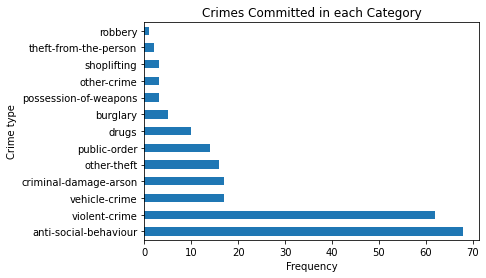

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

counts.plot(kind='barh')

plt.title('Crimes Committed in each Category')
plt.xlabel('Frequency')
plt.ylabel('Crime type')
plt.show()

In [ ]:
import requests 
import pandas as pd

area = 'https://data.police.uk/api/london/neighbourhoods'
r = requests.get(area)

df = pd.DataFrame(r)
df

,0
0,b'Not Found'


Filtering crime types

# Weather API

api key: b19414406c70effb25f6b8de609f3945, open weather api

# Air Quality API

# Housing API

In [ ]:
x = [str(i) for i in range(1,100)]
y = sum([sum([int(char) for char in i]) for i in x])
y

900